**Example A :**
* We are going to use 2 layers
* Optimizer we are going to use SGD
* We are going to use without normalization

**Example B :**
* We are going to use 3 layers
* Optimizer we are going to use Adam
* We are going to use without normalization

**Example C :**
* We are going to use 2 layers
* Optimizer we are going to use Adam
* We are going to use with normalization and standardization

**Example A**

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [ ]:
insurance_data=pd.read_csv("/content/sample_data/insurance_data.csv")
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [ ]:
insurance_data_one_hot=pd.get_dummies(insurance_data)
insurance_data_one_hot.head(10)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,True,False,False
5,31,25.740,0,3756.62160,True,False,True,False,False,True,False


In [ ]:
x=insurance_data_one_hot.drop("charges",axis=1)
y=insurance_data_one_hot["charges"]

print("Features are")
x.head()
print(x.to_string())

Features are
   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  region_northwest  region_southeast  region_southwest
0   19  27.900         0        True     False      False        True             False             False              True
1   18  33.770         1       False      True       True       False             False              True             False
2   28  33.000         3       False      True       True       False             False              True             False
3   33  22.705         0       False      True       True       False              True             False             False
4   32  28.880         0       False      True       True       False              True             False             False
5   31  25.740         0        True     False       True       False             False              True             False


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
tf.random.set_seed(42)
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(150,activation="relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

In [ ]:
history_model1=insurance_model.fit(x_train,y_train,epochs=500,verbose=0)

In [ ]:
insurance_model.evaluate(x_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 8313.6875 - mae: 8313.6875


[8313.6875, 8313.6875]

Text(0.5, 1.0, 'Loss vs Epochs')

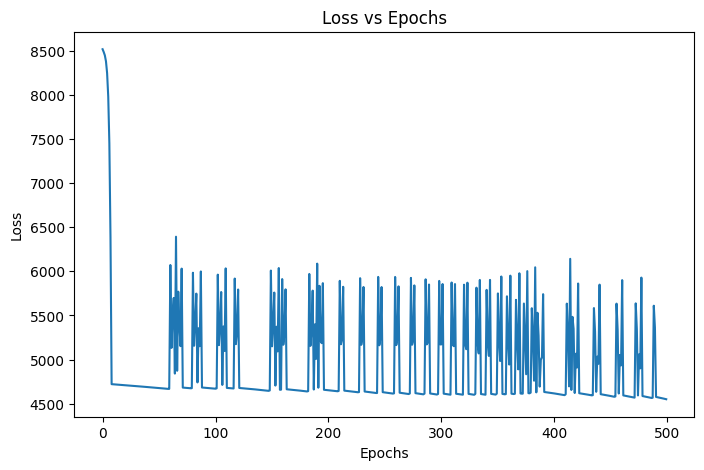

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history_model1.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")

***Exercise B***

In [ ]:
tf.random.set_seed(42)
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(200,activation="relu"),    #100 is the neurons dense in this layer
    tf.keras.layers.Dense(20,activation="relu"),     #10 is the neurons in this layer
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

history_model2=insurance_model_2.fit(x_train,y_train,epochs=500,verbose=0)

In [ ]:
insurance_model_2.evaluate(x_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 7881.1538 - mae: 7881.1538


[7881.15380859375, 7881.15380859375]

In [ ]:
insurance_model_2_loss,insurance_model_2_mae=insurance_model_2.evaluate(x_test,y_test)

print("Loss:",insurance_model_2_loss)
print("MAE:",insurance_model_2_mae)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 7881.1538 - mae: 7881.1538
Loss: 7881.15380859375
MAE: 7881.15380859375


Text(0.5, 1.0, 'Loss vs Epochs')

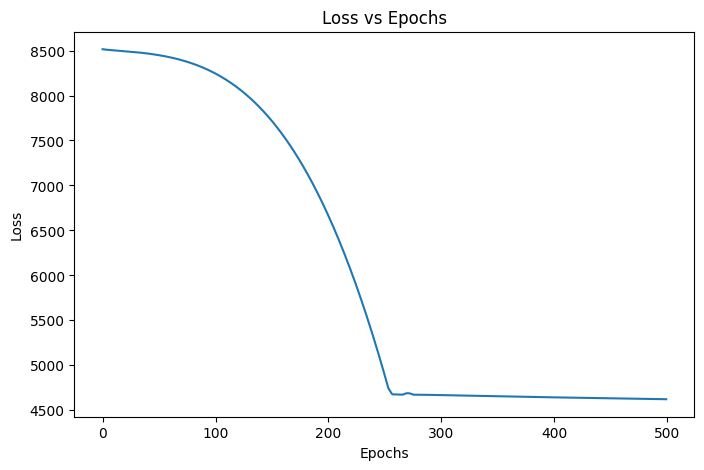

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history_model2.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")

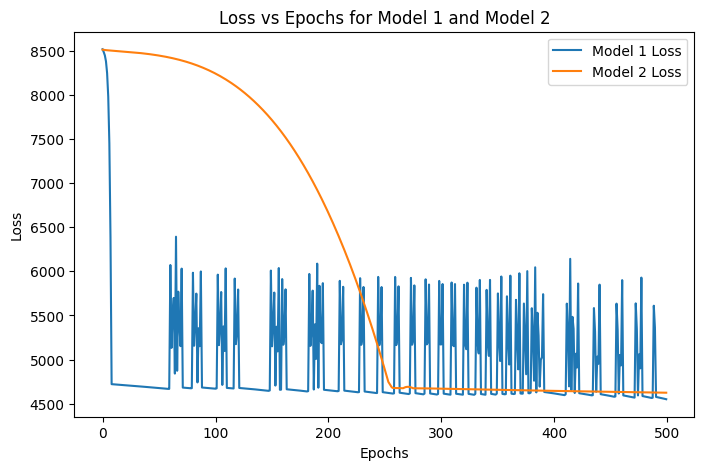

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history_model1.history['loss'], label='Model 1 Loss')
plt.plot(history_model2.history['loss'], label='Model 2 Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for Model 1 and Model 2")
plt.legend()
plt.show()

**Exercise C**

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
x=insurance_data.drop("charges",axis=1)
y=insurance_data["charges"]

In [ ]:
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
    )

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
ct.fit(x_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [ ]:
x_train_normal=ct.transform(x_train)
x_test_normal=ct.transform(x_test)

In [ ]:
#Non-normalized data
x_train

,age,sex,bmi,children,smoker,region
5,31,female,25.740,0,no,southeast
2,28,male,33.000,3,no,southeast
4,32,male,28.880,0,no,northwest
3,33,male,22.705,0,no,northwest


In [ ]:
#Normalized data
x_train_normal

array([[0.6       , 0.2948033 , 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        ],
       [0.        , 1.        , 1.        , 0.        , 1.        ,
        1.        , 0.        , 1.        ],
       [0.8       , 0.59980573, 0.        , 0.        , 1.        ,
        1.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 1.        , 0.        ]])

In [ ]:
print("x_train_shape",x_train.shape)
print("x_train_normal_shape",x_train_normal.shape)

x_train_shape (4, 6)
x_train_normal_shape (4, 8)


In [ ]:
tf.random.set_seed(42)
insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),    #100 is the neurons dense in this layer
    tf.keras.layers.Dense(50,activation="relu"),     #10 is the neurons in this layer
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

history_model3=insurance_model_3.fit(x_train_normal,y_train,epochs=500,verbose=0)

In [ ]:
insurance_model_3.evaluate(x_test_normal,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 8577.1016 - mae: 8577.1016


[8577.1015625, 8577.1015625]

In [ ]:
insurance_model_3_loss,insurance_model_3_mae=insurance_model_3.evaluate(x_test_normal,y_test)

print("Loss:",insurance_model_2_loss)
print("MAE:",insurance_model_2_mae)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 8577.1016 - mae: 8577.1016
Loss: 7881.15380859375
MAE: 7881.15380859375


Text(0.5, 1.0, 'Loss vs Epochs')

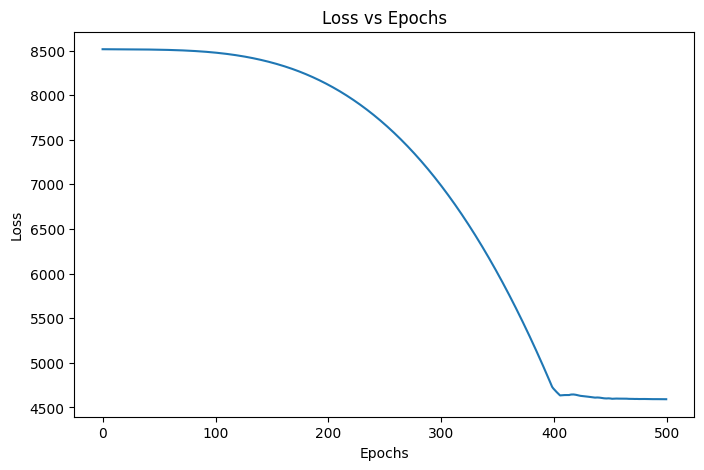

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history_model3.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")

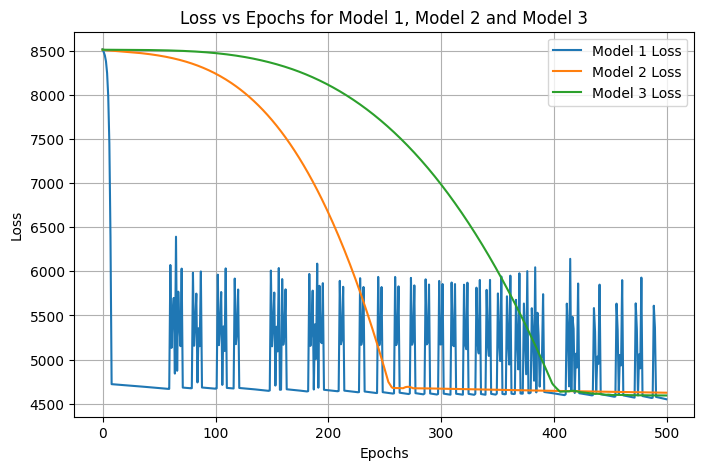

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history_model1.history['loss'], label='Model 1 Loss')
plt.plot(history_model2.history['loss'], label='Model 2 Loss')
plt.plot(history_model3.history['loss'], label='Model 3 Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for Model 1, Model 2 and Model 3")
plt.legend()
plt.grid()
plt.show()